## Preprocessing and Importing Libraries

In [1]:
#importing all the libraries we will need for this analysis
import pandas as pd
import numpy as np
import pandas as pd
import sqlite3
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import statistics
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [2]:
#having jupyter notebook read and 'import' dataset we will be using
df = pd.read_csv('Data/Life_Expectancy_Data.csv')


In [3]:
#getting an idea of what this dataset contains
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#checking the length of the data before we touch and clean it
len(df)

2938

## Data Cleaning

In [5]:
#dropping all the rows where 'status' = developed
df_developing = df.loc[df['Status'] == 'Developing']
df_developing

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
#ensuring our df only has developing under status now
df_developing['Status'].unique()


array(['Developing'], dtype=object)

In [7]:
#checking length of dataset once we dropped 'status' = developed
len(df_developing)

2426

In [8]:
#removed all rows from our dataframe except Alcohol, Schooling, Life Expectancy
data = df_developing[['Alcohol', 'Schooling', 'Life expectancy ']]
data

,Alcohol,Schooling,Life expectancy
0,0.01,10.1,65.0
1,0.01,10.0,59.9
2,0.01,9.9,59.9
3,0.01,9.8,59.5
4,0.01,9.5,59.2
...,...,...,...
2933,4.36,9.2,44.3
2934,4.06,9.5,44.5
2935,4.43,10.0,44.8
2936,1.72,9.8,45.3


In [9]:
#dropped all null rows that are in data and  now this df is called data_not_null
data_not_null = data.dropna()
data_not_null.isna().sum()

Alcohol             0
Schooling           0
Life expectancy     0
dtype: int64

In [10]:
#checking the length of our current data set with only status=developing and no null values in Alcohol,Schooling, and Life Expectancy
len(data_not_null)

2146

In [11]:
# 'Minimum' calculation for boxplot to assist in dropping outliers in our dependant variable life expectancy
q1 = data_not_null.quantile(0.25)['Life expectancy ']
q3 = data_not_null.quantile(0.75)['Life expectancy ']
iqr = q3 - q1
minimum = q1 - 1.5*iqr
minimum

43.49999999999999

In [12]:
# now we drop all rows that are an outlier
#this will be the cleaned data that we will be using for modeling/ testing/ training
data_not_null = data_not_null.loc[data_not_null['Life expectancy '] >= minimum]
data_not_null

,Alcohol,Schooling,Life expectancy
0,0.01,10.1,65.0
1,0.01,10.0,59.9
2,0.01,9.9,59.9
3,0.01,9.8,59.5
4,0.01,9.5,59.2
...,...,...,...
2933,4.36,9.2,44.3
2934,4.06,9.5,44.5
2935,4.43,10.0,44.8
2936,1.72,9.8,45.3


In [60]:
#x is our independant column and y is our depenant column for our regression that we will be doing
X = data_not_null[['Alcohol', 'Schooling']] 
y = data_not_null[['Life expectancy ']]

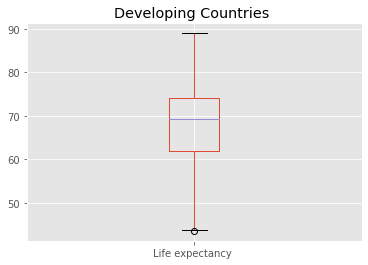

<Figure size 432x288 with 0 Axes>

In [61]:
y.boxplot()
 
plt.title('Developing Countries ')
#plt.legend()
 
# Set x and y axes labels
#plt.xlabel('Life Expectancy')
#plt.ylabel('')
 
#plt.xticks(rotation=45)
 
#shows the boxplot
plt.show()
 
#saving this boxplot for the presentation
plt.savefig("Developing Countries")

## Visualizations of the Data We Will be Utilizing

Text(0.5, 0, 'Life  Expectancy')

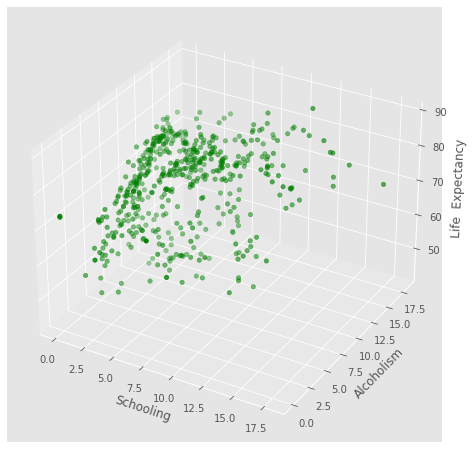

In [92]:
# build the figure instance of our 1 independant and 2 dependant variables in 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
#ax = fig.add_subplot(100, projection='3d')
ax.scatter(X1 , X2 , Y1 , c='green', marker='o')

# set your labels
ax.set_xlabel('Schooling')
ax.set_ylabel('Alcoholism')
ax.set_zlabel('Life  Expectancy')

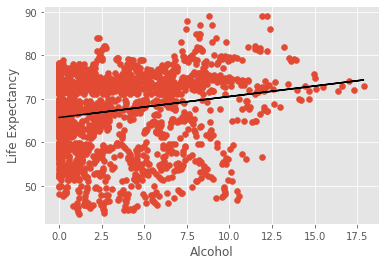

In [91]:
#plot of Alcohol vs. Life Expectancy to get an idea of the data we are working with
x_alc = data_not_null['Alcohol'].values
y_life_expectancy = data_not_null['Life expectancy '].values
plt.scatter(x_alc, y_life_expectancy, )

a, b = np.polyfit(x_alc, y_life_expectancy,1)
plt.plot(x_alc,a*x_alc+b, color = 'black')

plt.xlabel('Alcohol')
plt.ylabel('Life Expectancy')
plt.show()


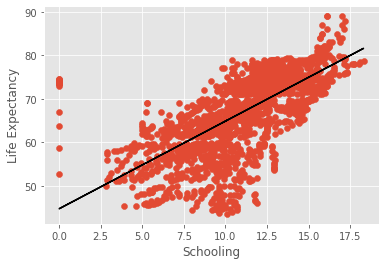

In [94]:
#plot of Schooling vs. Life Expectancy to get an idea of the data we are working with
#we notice that the Schooling vs. Life expectancy seems to be a much tigheter fit
#we decide to focus on 2D plotting Schooling vs. life expectancy

x_sch = data_not_null['Schooling'].values
y_life_expectancy = data_not_null['Life expectancy '].values
plt.scatter(x_sch, y_life_expectancy)

plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')

a, b = np.polyfit(x_sch, y_life_expectancy,1)
plt.plot(x_sch,a*x_sch+b, color = 'black')
plt.show()


## 2D: Life Expectancy vs. Schooling

In [95]:
#linear regression model for all of school data points
#this is just done to get an idea of what the coefficients may be

rho = np.corrcoef(x_sch,y_life_expectancy)[0][1]
s_y = x_sch.std()
s_x = y_life_expectancy.std()
m = rho * s_y / s_x

mean_y = x_sch.mean()
mean_x = y_life_expectancy.mean()
c = mean_y - m * mean_x

print(f"Our regression line is: y = {round(m, 5)}x + {round(c, 5)}")

Our regression line is: y = 0.22915x + -4.19677


In [102]:
#now we are splitting our data so we may train and test our data
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_sch, y_life_expectancy, random_state=0)

In [103]:
#linear regression model for school only train values

rho = np.corrcoef(X_train1,y_train1)[0][1]
s_y = X_train1.std()
s_x = y_train1.std()
m = rho * s_y / s_x

mean_y = X_train1.mean()
mean_x = y_train1.mean()
c = mean_y - m * mean_x

print(f"Our regression line is: y = {round(m, 5)}x + {round(c, 5)}")

Our regression line is: y = 0.23159x + -4.38385


In [104]:
#here we begin fitting our stats model
model = sm.OLS(endog=y_test1, exog=sm.add_constant(X_test1))
model

In [105]:
#M0.Results contains our fitted model
results = model.fit()
results

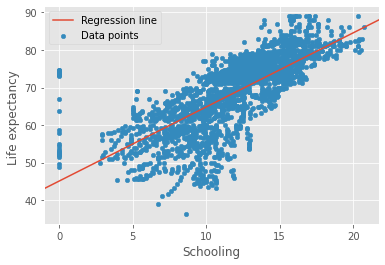

In [106]:
fig, ax = plt.subplots()
df.plot.scatter(x="Schooling", y="Life expectancy ", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)
ax.legend();

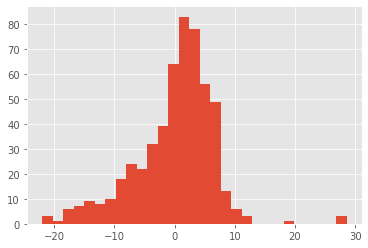

In [107]:
plt.hist(results.resid, bins="auto");

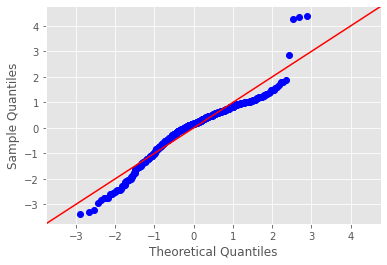

In [108]:
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)
plt.show()

## 3D: Life Expectancy vs. Schooling vs. Alcoholism

In [125]:
#now we are splitting our data so we may training and testing our data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#here is where we are fitting our data model
#X_train1, X_test1, y_train1, y_test1 = train_test_split(x_sch, y_life_expectancy, random_state=0)

lin_reg_model = LinearRegression().fit(X_train,y_train)


#this is where we are getting our predictions per our fitted model
y_train_pred = lin_reg_model.predict(X_train)
y_test_pred = lin_reg_model.predict(X_test)

## Results and Findings 2D: Life Expectancy vs. Schooling

In [109]:
#below are the results of the measures of accuracy and precision of our model  fit
print(f"The fvalue and fpvalue is {results.fvalue, results.f_pvalue}")

print(f"Rsquared is = {results.rsquared} ")

print(f"The params are {results.params}")

print(f"The pvalues are {results.pvalues}")

print(f"The confidence intervals are {results.conf_int()}")



The fvalue and fpvalue is (415.17798889743284, 1.1176750920345278e-68)
Rsquared is = 0.437869254252794 
The params are [45.06123698  1.97608673]
The pvalues are [1.62403374e-161 1.11767509e-068]
The confidence intervals are [[42.83400297 47.288471  ]
 [ 1.7855739   2.16659957]]


In [110]:
#below are the results of the measures of accuracy and precision of our model fit
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     415.2
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.12e-68
Time:                        06:56:57   Log-Likelihood:                -1761.7
No. Observations:                 535   AIC:                             3527.
Df Residuals:                     533   BIC:                             3536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.0612      1.134     39.744      0.0

In [111]:
#below are the results of the measures of accuracy and precision of our model  fit
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     415.2
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.12e-68
Time:                        06:56:57   Log-Likelihood:                -1761.7
No. Observations:                 535   AIC:                             3527.
Df Residuals:                     533   BIC:                             3536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.0612      1.134     39.744      0.000      42.834      47.288
x1             1.9761      0.097     20.376      0.000       1.786       2.167
==============================================================================
Omnibus:                       46.791   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.305
Skew:                          -0.414   Prob(JB):                     8.35e-29
Kurtosis:                       5.262   Cond. No.                         47.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Results and Findings 3D: Life Expectancy vs. Schooling vs. Alcoholism

In [124]:
#calculating the mean squared error of the train and test data

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(train_mse)
print(test_mse)

40.36748044707949
41.38511911427731


In [123]:
#calculating the mean of the absolute error 
#this is the difference between the forecasted value and the actual value

mean_absolute_error(Y1, y_test_pred)

4.705200928097663

In [57]:
#calulating the root mean square error
#this is the square root of the mean square error
rmse = mean_squared_error(Y1, y_test_pred, squared=False)
rmse

6.433126698136553

In [58]:
#min of life expectancy in our data set
min = data_not_null['Life expectancy '].min()
min

43.5

In [59]:
#max of life expectancy in our data set
max = data_not_null['Life expectancy '].max()
max

89.0

In [42]:
#normalizing the RMSE, this gives a value between 0 to 1
#closer to 0 means its a better fitted model
rmse/(max-min)

0.14138739995904512